# Impact Analysis #

Now that we have the tool we can do some investigations:

- What is the impact of changing the data source ? 
- Does it make a difference if we take avarage rates instead of end of day rates ?

## Setup the Environmant ##
But first we need to setup the JupyterLab environment

In [1]:
%classpath config resolver maven-public http://pschatzmann.ch:8081/repository/maven-public/
%classpath add mvn ch.pschatzmann:investor:0.9-SNAPSHOT
%classpath add mvn ch.pschatzmann:jupyter-jdk-extensions:0.0.1-SNAPSHOT


Added new repo: maven-public


Added jars: [htmlunit-2.24.jar, jackson-annotations-2.9.4.jar, commons-codec-1.10.jar, ta4j-core-0.10.jar, websocket-api-9.2.20.v20161216.jar, jcl-over-slf4j-1.7.25.jar, commons-cli-1.3.1.jar, commons-attributes-api-2.2.jar, httpmime-4.5.2.jar, httpcore-4.4.6.jar, htmlunit-core-js-2.23.jar, sevenzipjbinding-9.20-2.00beta.jar, ant-1.5.jar, YahooFinanceAPI-3.12.3.jar, jfreechart-1.5.0.jar, jetty-util-9.2.20.v20161216.jar, slf4j-log4j12-1.7.25.jar, cssparser-0.9.21.jar, neko-htmlunit-2.24.jar, commons-io-2.5.jar, xml-apis-1.4.01.jar, serializer-2.7.2.jar, qdox-1.5.jar, jetty-io-9.2.20.v20161216.jar, commons-lang3-3.5.jar, timeseries-forecast-1.1.1.jar, httpclient-4.5.3.jar, jackson-databind-2.9.4.jar, sojo-1.0.5.jar, commons-jcs-core-2.0.jar, investor-0.9-SNAPSHOT.jar, junit-4.10.jar, jackson-core-2.9.4.jar, websocket-client-9.2.20.v20161216.jar, xercesImpl-2.11.0.jar, hamcrest-core-1.1.jar, combinatoradix-0.8.2.jar, sevenzipjbinding-all-platforms-9.20-2.00beta.jar, sac-1.3.jar, websocket

Added jars: [jcs-1.3.jar, commons-logging-1.1.jar, servlet-api-2.3.jar, logkit-1.0.1.jar, jupyter-jdk-extensions-0.0.1-SNAPSHOT.jar, avalon-framework-4.1.3.jar, in-memory-stardb-0.0.1-SNAPSHOT.jar, concurrent-1.3.4.jar, common-0.0.1-SNAPSHOT.jar]


In [2]:
// our stock evaluation framwork
import ch.pschatzmann.dates._;
import ch.pschatzmann.stocks._;
import ch.pschatzmann.stocks.data.universe._;
import ch.pschatzmann.stocks.input._;
import ch.pschatzmann.stocks.accounting._;
import ch.pschatzmann.stocks.accounting.kpi._;
import ch.pschatzmann.stocks.execution._;
import ch.pschatzmann.stocks.execution.fees._;
import ch.pschatzmann.stocks.execution.price._;
import ch.pschatzmann.stocks.parameters._;
import ch.pschatzmann.stocks.strategy._;
import ch.pschatzmann.stocks.strategy.optimization._;
import ch.pschatzmann.stocks.strategy.allocation._;
import ch.pschatzmann.stocks.strategy.selection._;
import ch.pschatzmann.stocks.integration._;
import ch.pschatzmann.stocks.integration.ChartData.FieldName._;
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._;

/// jupyter custom displayer
import ch.pschatzmann.display.Displayers

// java
import java.util.stream.Collectors;
import java.util._;
import java.lang._;
import java.util.function.Consumer;



import ch.pschatzmann.dates._
import ch.pschatzmann.stocks._
import ch.pschatzmann.stocks.data.universe._
import ch.pschatzmann.stocks.input._
import ch.pschatzmann.stocks.accounting._
import ch.pschatzmann.stocks.accounting.kpi._
import ch.pschatzmann.stocks.execution._
import ch.pschatzmann.stocks.execution.fees._
import ch.pschatzmann.stocks.execution.price._
import ch.pschatzmann.stocks.parameters._
import ch.pschatzmann.stocks.strategy._
import ch.pschatzmann.stocks.strategy.optimization._
import ch.pschatzmann.stocks.strategy.allocation._
import ch.pschatzmann.stocks.strategy.selection._
import ch.pschatzmann.stocks.integration._
import ch.pschatzmann.stocks.integration.ChartData.FieldName._
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._
import ch.pschatzmann.d...

In [3]:
Displayers.setup()


true

## Impact of Data Source ##

First we want to investigate the impact of the data source on the result of a trading strategy. We use Apple with the RSI2 Strategy and check the result for different data readers. 

### MarketArchiveHttpReader ###

In [4]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0));
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var strategy = new RSI2Strategy(stockdata);
var trader = new PaperTrader(account);
var state = new Fitness(trader).getFitness(strategy, account.getDateRange());

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn);


Return: 56741.0

### Quandl WIKI ###

In [5]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0));
var stockdataQ = new StockData(new StockID("AAPL", "NASDAQ"), new QuandlWIKIReader());
var strategy = new RSI2Strategy(stockdataQ);
var trader = new PaperTrader(account);
var state = new Fitness(trader).getFitness(strategy, account.getDateRange());

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn);

Return: 36996.0

### Yahoo ###

In [19]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0));
var stockdataYahoo = new StockData(new StockID("AAPL", "NASDAQ"), new YahooReader());
var strategy = new RSI2Strategy(stockdataYahoo);
var trader = new PaperTrader(account);
var state = new Fitness(trader).getFitness(strategy, account.getDateRange());

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn);

Return: 5585.0

### AlphaVantageReader

In [18]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0));
var stockdataYahoo = new StockData(new StockID("AAPL", "NASDAQ"), new AlphaVantageReader());
var strategy = new RSI2Strategy(stockdataYahoo);
var trader = new PaperTrader(account);
var state = new Fitness(trader).getFitness(strategy, account.getDateRange());

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn);

Return: 49922.0

We can compare the three data sources on a chart

### IEXReader

In [17]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0));
var stockdataYahoo = new StockData(new StockID("AAPL", "NASDAQ"), new IEXReader());
var strategy = new RSI2Strategy(stockdataYahoo);
var trader = new PaperTrader(account);
var state = new Fitness(trader).getFitness(strategy, account.getDateRange());

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn);

Return: 0.0


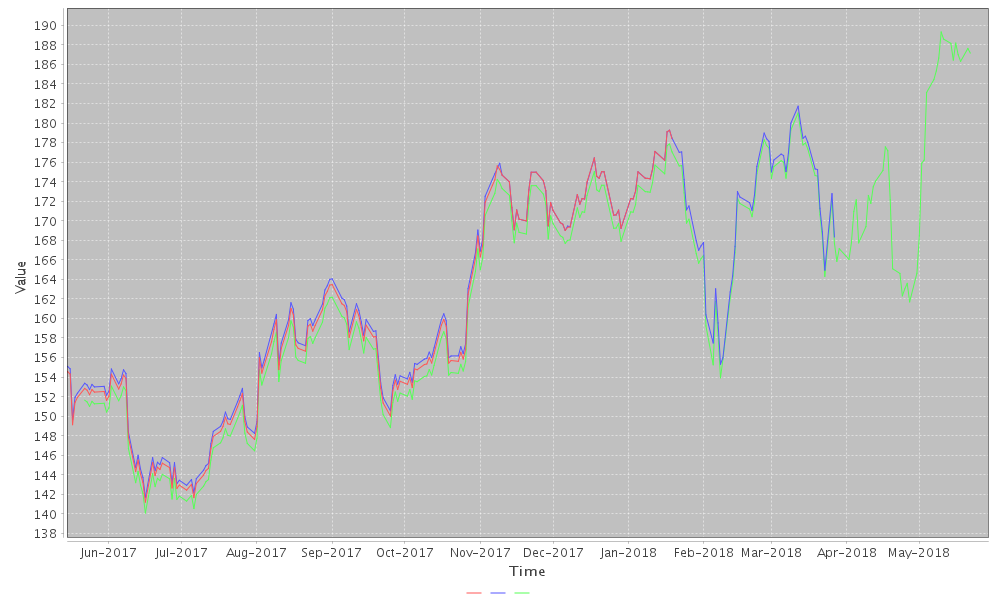

In [7]:

new TimeSeriesChart().add(stockdata).add(stockdataQ).add(stockdataYahoo)

## Impact of Selection of Rate ##
### Closing Prices ###

In [8]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new ClosePrice())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 56741.0

### Open Prices ###

In [9]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new OpenPrice())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 46682.0

### Avarege (between High and Low) Prices ###

In [10]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new AvaragePrice())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 1060.0

## Impact of Delays ##
### Same Day ##
We assume that we can do the deal at the close price for the same day. This suffers from look ahead bias because during the day the close price is not know

In [11]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new ClosePrice())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 56741.0

### Open Price of Next Day ##

We get the buy/sell signar based on the closing price and perform the trade the next day at the open price

In [12]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new OpenPrice())
trader.setDelay(new OneDayDelay())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 54389.0

### Close Price of Next Day ##

We get the buy/sell signar based on the closing price and perform the trade the next day at the close price

In [13]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new ClosePrice())
trader.setDelay(new OneDayDelay())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 56004.0

### Avarage Price of Next Day ##

We get the buy/sell signar based on the closing price and perform the trade the next day at the close price

In [14]:
var account = new Account("Simulation","USD", 100000.00, Context.date("2015-01-01"), new PerTradeFees(10.0))
var stockdata = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader())
var strategy = new RSI2Strategy(stockdata)
var trader = new PaperTrader(account)
trader.setPrice(new AvaragePrice())
trader.setDelay(new OneDayDelay())
var state = new Fitness(trader).getFitness(strategy, account.getDateRange())

// print one parameter
"Return: " + state.result().getValue(KPI.AbsoluteReturn)

Return: 4439.0